In [4]:
import fastai
import torch
from fastai.vision.all import *
import numpy as np

In [5]:
path = untar_data(URLs.CAMVID_TINY)

path.ls()

(#3) [Path('/root/.fastai/data/camvid_tiny/labels'),Path('/root/.fastai/data/camvid_tiny/images'),Path('/root/.fastai/data/camvid_tiny/codes.txt')]

In [6]:
def label_getter(file):
  return path/'labels'/f'{file.stem}_P{file.suffix}'

dls = SegmentationDataLoaders.from_label_func(path, bs=8, fnames=get_image_files(path/'images'),
                                              label_func=label_getter, codes=np.loadtxt(path/'codes.txt',
                                                                                        dtype=str))

learn = unet_learner(dls, resnet34)

learn.fine_tune(12)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 156MB/s]


epoch,train_loss,valid_loss,time
0,3.887914,2.636848,00:02


epoch,train_loss,valid_loss,time
0,2.020123,1.642939,00:01
1,1.738659,1.407025,00:01
2,1.566514,1.235800,00:01
3,1.425666,1.002064,00:01
4,1.299766,0.879774,00:01
5,1.171824,0.797232,00:01
6,1.056971,0.737656,00:01
7,0.959533,0.695748,00:01
8,0.876340,0.678814,00:01
9,0.806265,0.674411,00:01


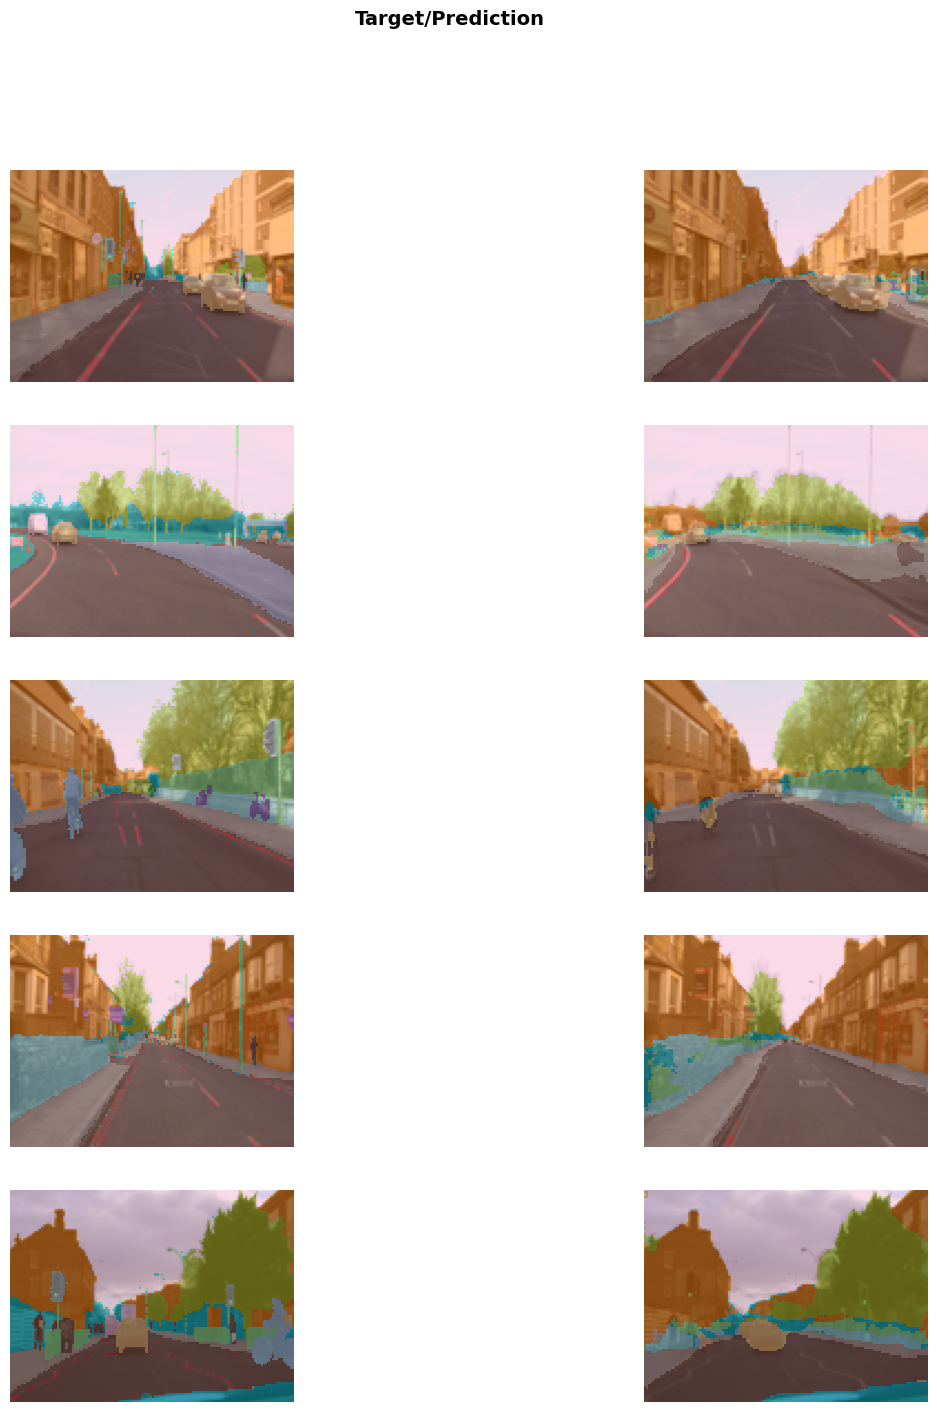

In [7]:
learn.show_results(max_n=5, figsize=(15,16))